In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

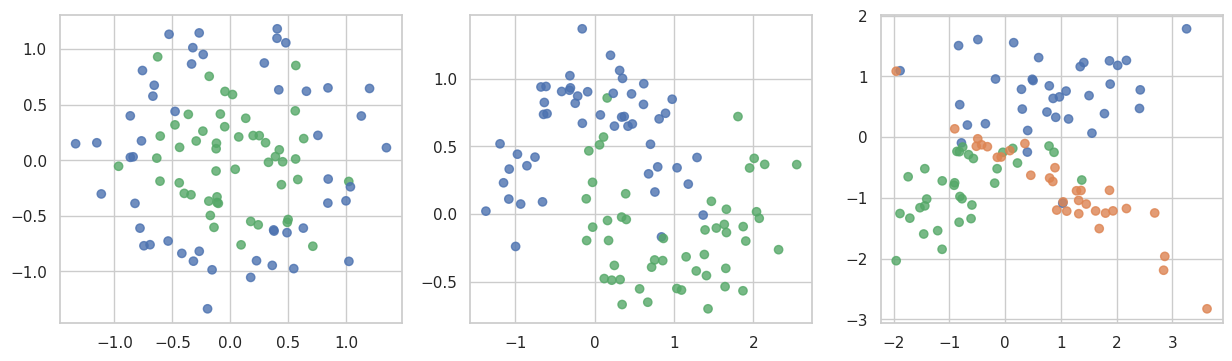

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией plot_surface, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [ ]:
from sklearn.metrics import accuracy_score

Accuracy_train: 1.00
 Accuracy_test: 0.72


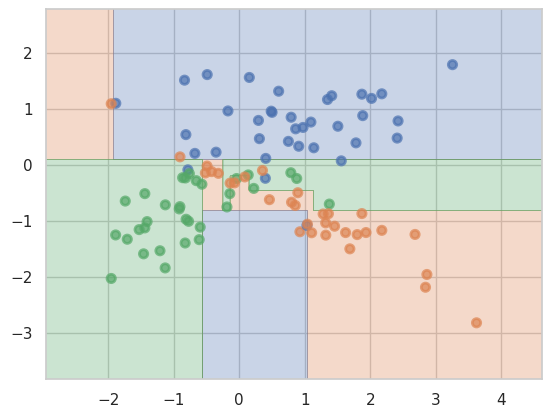

In [ ]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, predictions)
print(f"Accuracy_train: {accuracy_train:.2f}\n Accuracy_test: {accuracy_test:.2f}")
plot_surface(model, X, y)

Деревья ужасно переобучились

In [ ]:
par = [1, 3, 5, 10, 20]

In [ ]:
acc_train = []
acc_test = []

max_depth=1, min_samples_leaf=1
Accuracy_train: 0.65
 Accuracy_test: 0.60


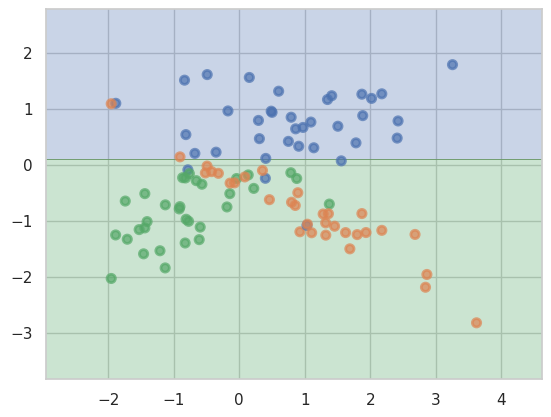

max_depth=1, min_samples_leaf=3
Accuracy_train: 0.65
 Accuracy_test: 0.60


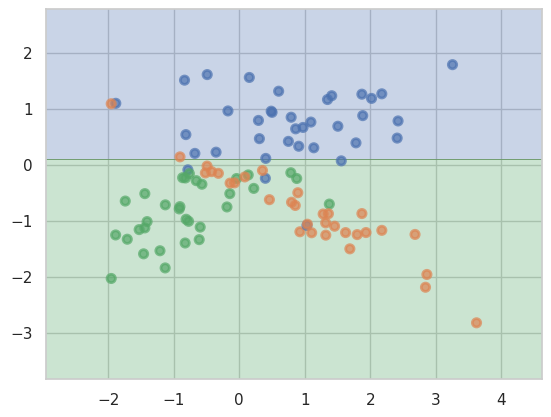

max_depth=1, min_samples_leaf=5
Accuracy_train: 0.65
 Accuracy_test: 0.60


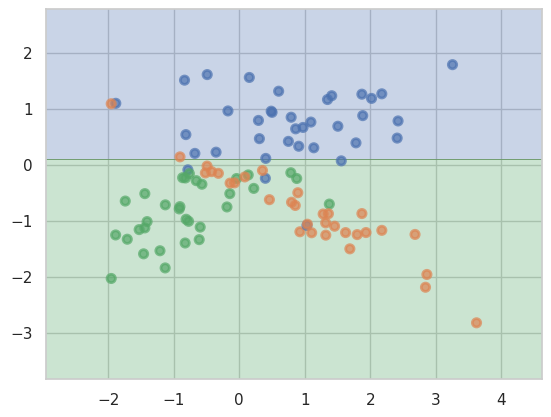

max_depth=1, min_samples_leaf=10
Accuracy_train: 0.65
 Accuracy_test: 0.60


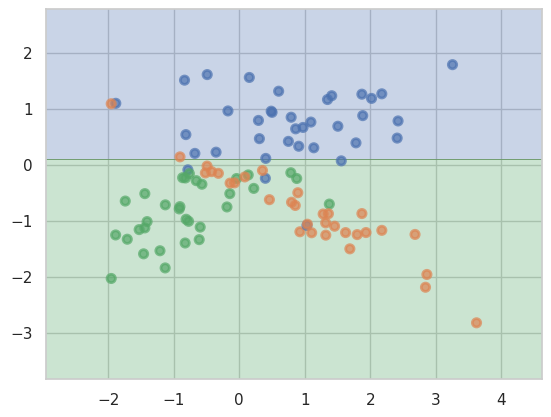

max_depth=1, min_samples_leaf=20
Accuracy_train: 0.65
 Accuracy_test: 0.60


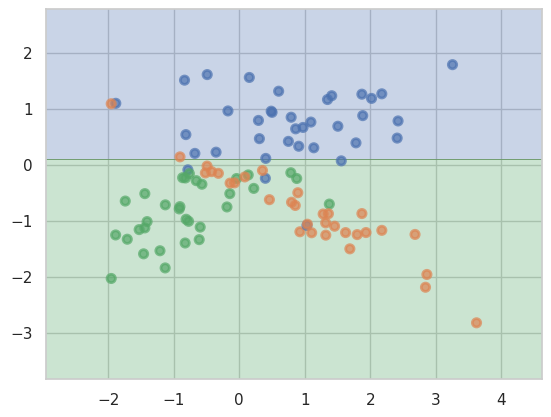

max_depth=3, min_samples_leaf=1
Accuracy_train: 0.89
 Accuracy_test: 0.80


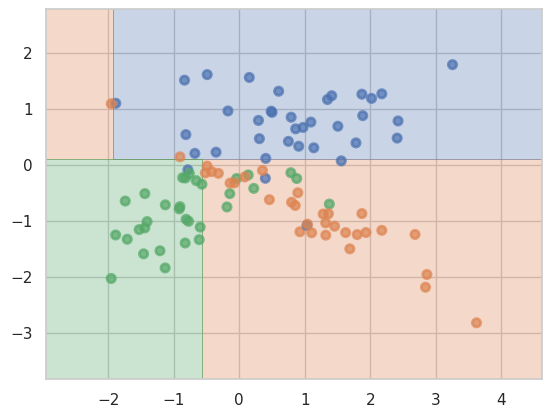

max_depth=3, min_samples_leaf=3
Accuracy_train: 0.88
 Accuracy_test: 0.80


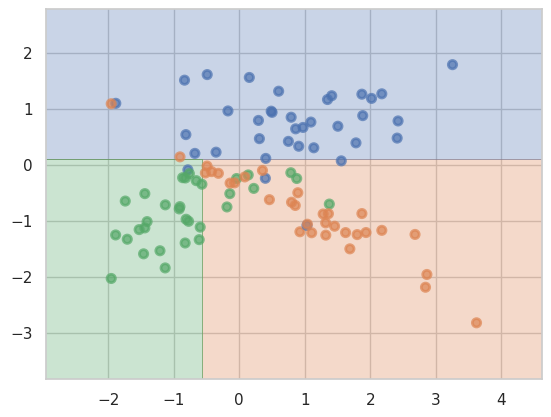

max_depth=3, min_samples_leaf=5
Accuracy_train: 0.88
 Accuracy_test: 0.80


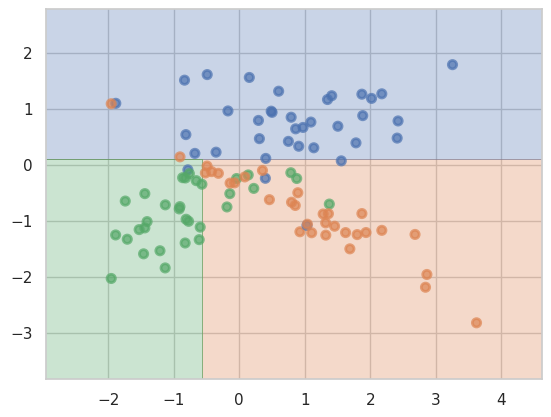

max_depth=3, min_samples_leaf=10
Accuracy_train: 0.88
 Accuracy_test: 0.80


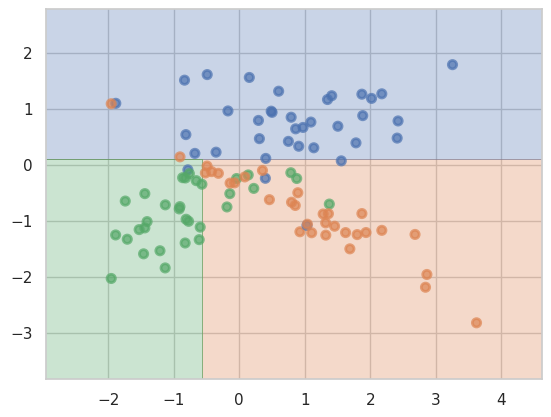

max_depth=3, min_samples_leaf=20
Accuracy_train: 0.88
 Accuracy_test: 0.80


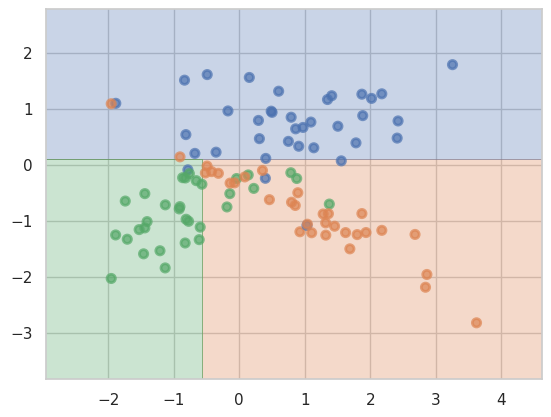

max_depth=5, min_samples_leaf=1
Accuracy_train: 0.93
 Accuracy_test: 0.72


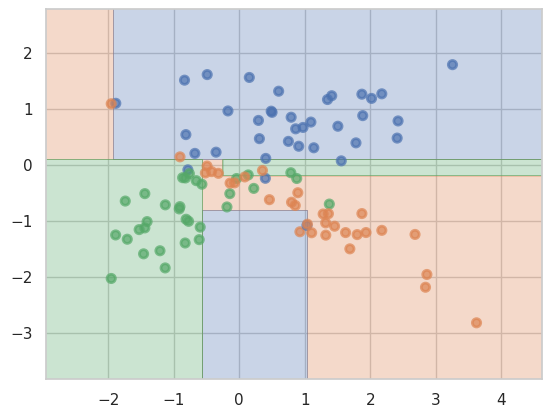

max_depth=5, min_samples_leaf=3
Accuracy_train: 0.91
 Accuracy_test: 0.80


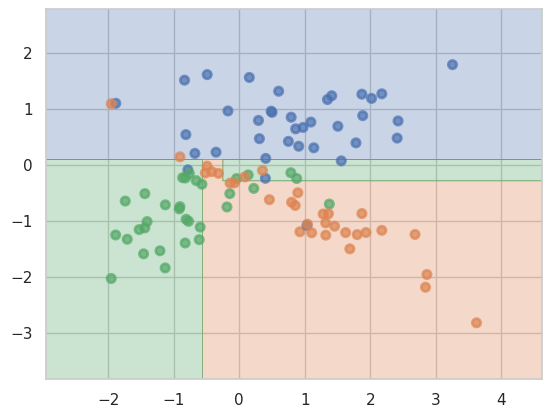

max_depth=5, min_samples_leaf=5
Accuracy_train: 0.91
 Accuracy_test: 0.72


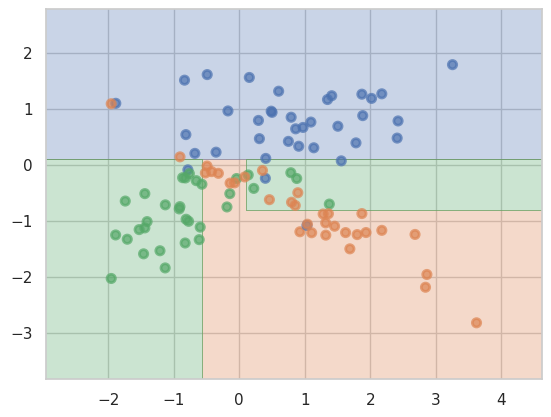

max_depth=5, min_samples_leaf=10
Accuracy_train: 0.88
 Accuracy_test: 0.80


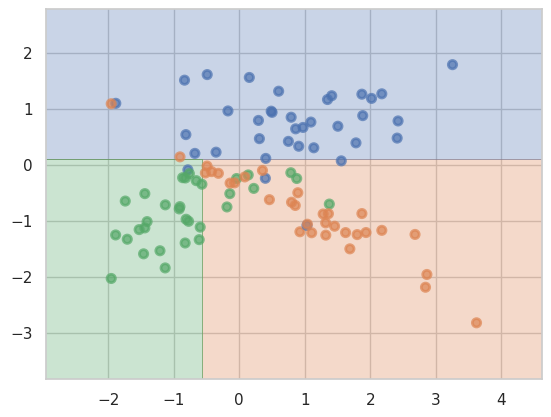

max_depth=5, min_samples_leaf=20
Accuracy_train: 0.88
 Accuracy_test: 0.80


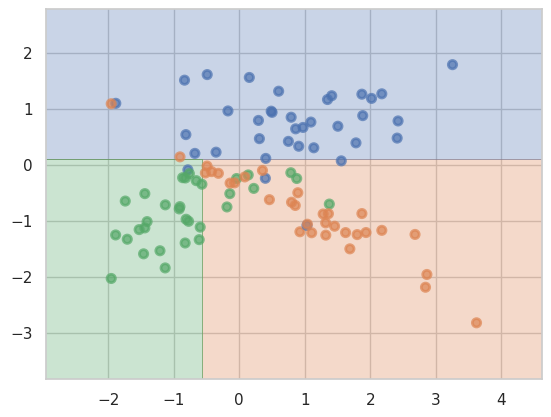

max_depth=10, min_samples_leaf=1
Accuracy_train: 1.00
 Accuracy_test: 0.72


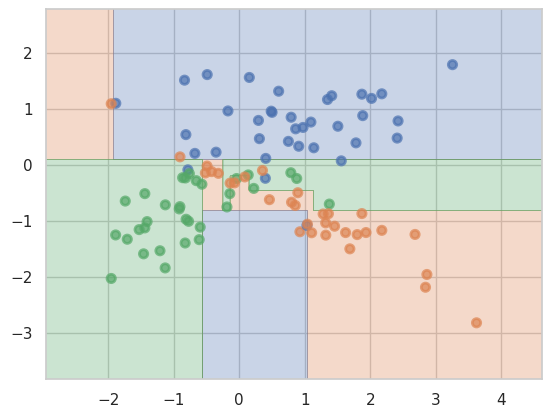

max_depth=10, min_samples_leaf=3
Accuracy_train: 0.92
 Accuracy_test: 0.76


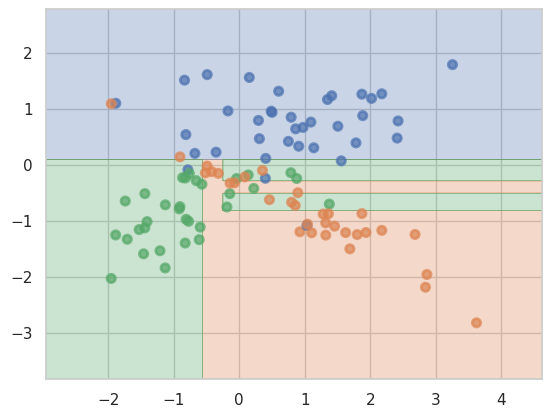

max_depth=10, min_samples_leaf=5
Accuracy_train: 0.91
 Accuracy_test: 0.72


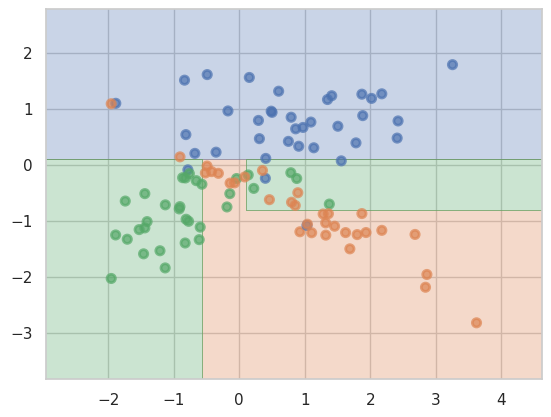

max_depth=10, min_samples_leaf=10
Accuracy_train: 0.88
 Accuracy_test: 0.80


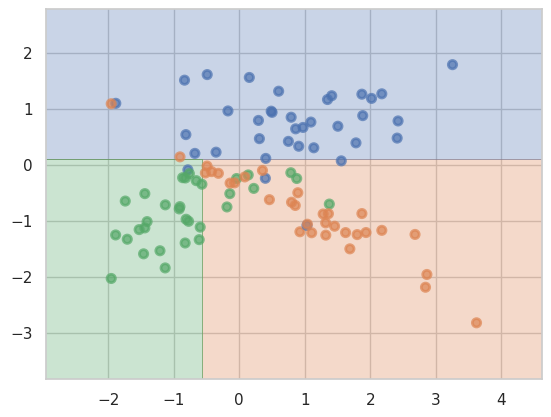

max_depth=10, min_samples_leaf=20
Accuracy_train: 0.88
 Accuracy_test: 0.80


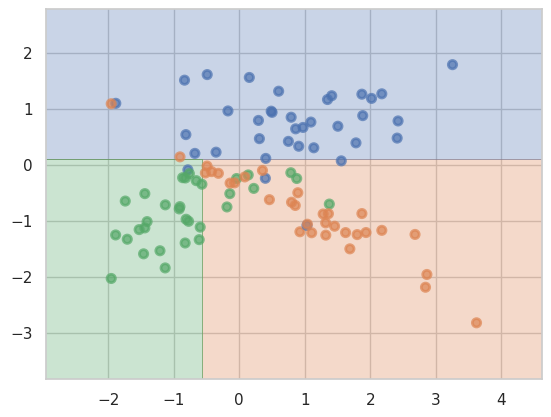

max_depth=20, min_samples_leaf=1
Accuracy_train: 1.00
 Accuracy_test: 0.72


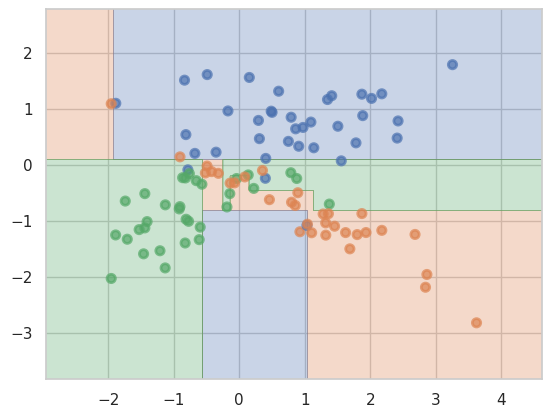

max_depth=20, min_samples_leaf=3
Accuracy_train: 0.92
 Accuracy_test: 0.76


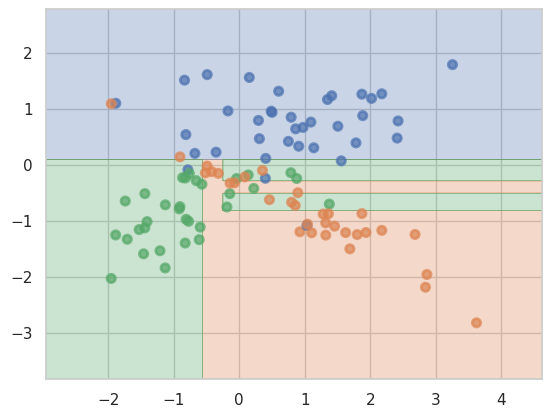

max_depth=20, min_samples_leaf=5
Accuracy_train: 0.91
 Accuracy_test: 0.72


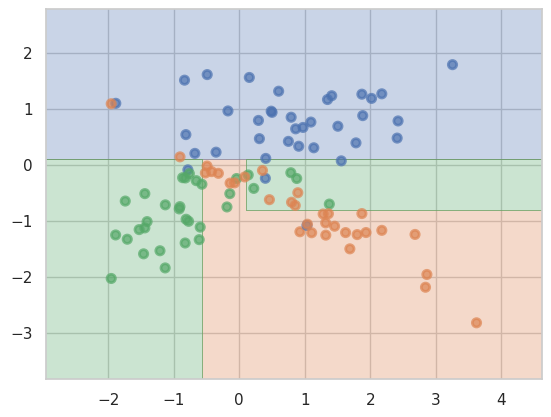

max_depth=20, min_samples_leaf=10
Accuracy_train: 0.88
 Accuracy_test: 0.80


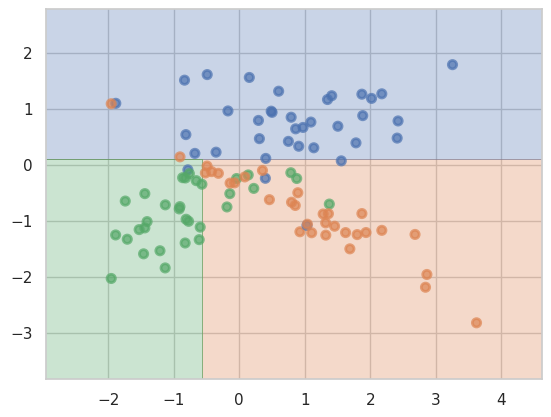

max_depth=20, min_samples_leaf=20
Accuracy_train: 0.88
 Accuracy_test: 0.80


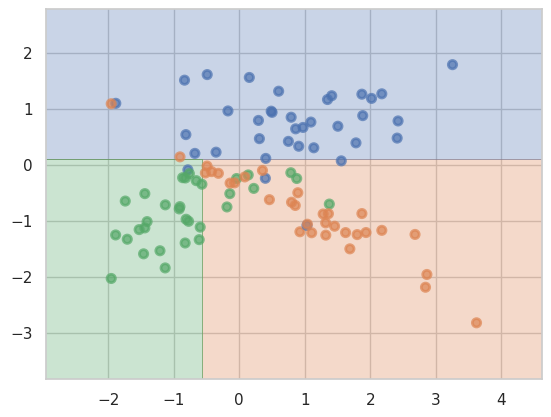

In [ ]:
for i in range(5):
  for j in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


    model = DecisionTreeClassifier(max_depth=par[i], min_samples_leaf=par[j])
    model.fit(X_train, y_train)


    predictions = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_test = accuracy_score(y_test, predictions)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    print(f"max_depth={par[i]}, min_samples_leaf={par[j]}")
    print(f"Accuracy_train: {accuracy_train:.2f}\n Accuracy_test: {accuracy_test:.2f}")

    plot_surface(model, X, y)

    plt.show()

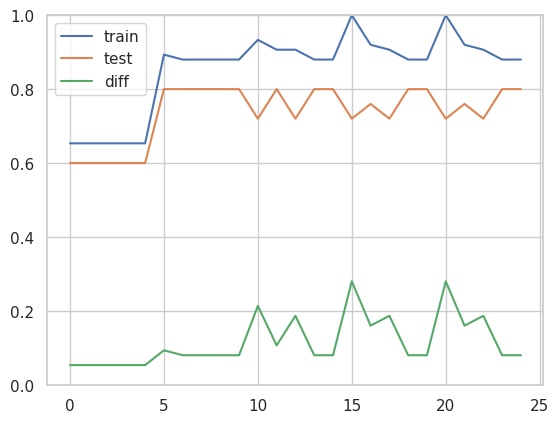

In [ ]:
plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
diff = np.array(acc_train) - np.array(acc_test)
plt.plot(diff, label='diff')

plt.ylim(0,1)
plt.legend()
plt.show()

Каждые 5 – увеличение min_samples_leaf, каждый шаг - увеличение глубины.

In [ ]:
et = pd.DataFrame()

In [ ]:
df = pd.read_csv('/content/agaricus-lepiota.data')

In [ ]:
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [ ]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
y = df['p']

In [ ]:
df.drop('p', inplace=True, axis=1)
X = df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, predictions)
print(f"Accuracy_train: {accuracy_train:.2f}\n Accuracy_test: {accuracy_test:.2f}")
# plot_surface(model, X, y)

Accuracy_train: 1.00
 Accuracy_test: 1.00


In [ ]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

acc_real = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

acc_cat = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ct = ColumnTransformer(
    transformers=[("ohe", ohe, list(range(X.shape[1])))]
)
clf_ohe = DecisionTreeClassifier(random_state=0)

acc_ohe = cross_val_score(
    model, X, y, cv=10, scoring="accuracy"
).mean()

et['Griby'] = np.array([acc_real, acc_cat, acc_ohe])

In [ ]:
df = pd.read_csv('/content/tic-tac-toe.data')

In [ ]:
df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [ ]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
y = df['positive']

In [ ]:
df.drop('positive', inplace=True, axis=1)
X = df

In [ ]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

acc_real = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

acc_cat = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ct = ColumnTransformer(
    transformers=[("ohe", ohe, list(range(X.shape[1])))]
)
clf_ohe = DecisionTreeClassifier(random_state=0)

acc_ohe = cross_val_score(
    model, X, y, cv=10, scoring="accuracy"
).mean()

et['XvsO'] = np.array([acc_real, acc_cat, acc_ohe])

In [ ]:
df = pd.read_csv('/content/car.data')

In [ ]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
y = df['unacc']
map_y = {"unacc": 0, "acc": 0, "good": 1, "vgood": 1}
y = y.map(map_y)
df.drop('unacc', inplace=True, axis=1)
X = df

In [ ]:
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

acc_real = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

acc_cat = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ct = ColumnTransformer(
    transformers=[("ohe", ohe, list(range(X.shape[1])))]
)
clf_ohe = DecisionTreeClassifier(random_state=0)

acc_ohe = cross_val_score(
    model, X, y, cv=10, scoring="accuracy"
).mean()

et['Cars'] = np.array([acc_real, acc_cat, acc_ohe])

In [ ]:
df = pd.read_csv('/content/nursery.data')

In [ ]:
df

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [ ]:
y = df['recommend']
map_y = {
        "not_recom": 0,
        "recommend": 0,
        "very_recom": 1,
        "priority": 1,
        "spec_prior": 1,
    }
y = y.map(map_y)
df.drop('recommend', inplace=True, axis=1)
X = df

In [ ]:
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

acc_real = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

acc_cat = cross_val_score(
        model, X, y, cv=10, scoring="accuracy"
    ).mean()

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ct = ColumnTransformer(
    transformers=[("ohe", ohe, list(range(X.shape[1])))]
)
clf_ohe = DecisionTreeClassifier(random_state=0)

acc_ohe = cross_val_score(
    model, X, y, cv=10, scoring="accuracy"
).mean()

et['nursery'] = np.array([acc_real, acc_cat, acc_ohe])

In [ ]:
df = pd.read_excel('/content/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls')

In [ ]:
df

,Data Set Characteristics: Multivariate,Unnamed: 1,Attribute Information:
0,Number of Instances: 403,NaN,STG (The degree of study time for goal object ...
1,Area: Education,NaN,SCG (The degree of repetition number of user f...
2,Attribute Characteristics: Real,NaN,STR (The degree of study time of user for rela...
3,Number of Attributes: 5,NaN,LPR (The exam performance of user for related ...
4,Associated Tasks: Classification,NaN,PEG (The exam performance of user for goal obj...
5,NaN,NaN,UNS (The knowledge level of user)
6,Class Distribution,NaN,NaN
7,Very Low: 50,NaN,NaN
8,Low:129,NaN,NaN
9,Middle: 122,NaN,NaN


?

In [ ]:
et

,Griby,XvsO,Cars,nursery
0,0.94094,0.945373,0.918904,0.999923
1,0.94094,0.942410,0.918904,0.999923
2,0.94241,0.940940,0.918904,0.999923


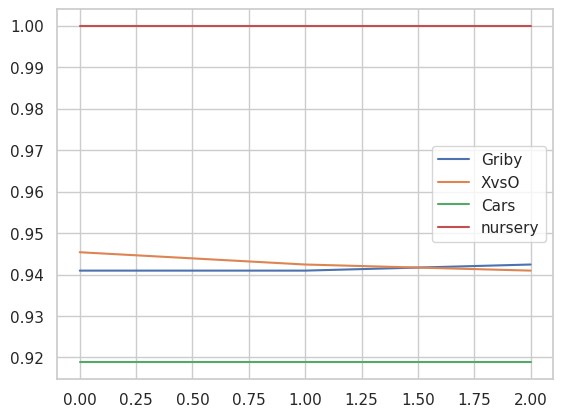

In [ ]:
plt.plot(et['Griby'], label='Griby')
plt.plot(et['XvsO'], label='XvsO')
plt.plot(et['Cars'], label='Cars')
plt.plot(et['nursery'], label='nursery')

plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('/content/application_train.csv')

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['TARGET']
X = df.drop('TARGET', axis=1)

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna("Missing")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
!pip install lightgb
!pip install catboost

ERROR: Could not find a version that satisfies the requirement lightgb (from versions: none)
ERROR: No matching distribution found for lightgb
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
import time

In [ ]:
t = time.time()

In [ ]:
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_train_num = X_train.copy()
X_test_num = X_test.copy()
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train_num[cat_cols] = oe.fit_transform(X_train_num[cat_cols])
X_test_num[cat_cols] = oe.transform(X_test_num[cat_cols])

In [ ]:
lgb_train = lgb.Dataset(X_train_num, label=y_train)
lgb_test = lgb.Dataset(X_test_num, label=y_test, reference=lgb_train)

In [ ]:
params_lgb = {
    "objective": "binary",
    "metric": "average_precision",
}

In [ ]:
t0 = time.time()
lgb_clf = lgb.train(
    params_lgb,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
)

lgb_time = time.time() - t0

y_pred_lgb = lgb_clf.predict(X_test_num)
lgb_ap = average_precision_score(y_test, y_pred_lgb)

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.187272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11446
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771


In [ ]:
cat_features_idx = [X_train.columns.get_loc(c) for c in cat_cols]
train_pool = Pool(X_train, y_train, cat_features=cat_features_idx)
valid_pool = Pool(X_test, y_test, cat_features=cat_features_idx)

cat_params = {
    'iterations': 300,
    "loss_function": "Logloss",
    "eval_metric": "PRAUC",
    "verbose": False,
    "random_seed": 0,
}


In [ ]:
t0 = time.time()
cat_clf = CatBoostClassifier(**cat_params)
cat_clf.fit(train_pool, eval_set=valid_pool)
cat_time = time.time() - t0

y_pred_cat = cat_clf.predict_proba(valid_pool)[:, 1]
cat_ap = average_precision_score(y_test, y_pred_cat)

In [ ]:
print("LightGBM AP:", lgb_ap, "time:", lgb_time)
print("CatBoost AP:", cat_ap, "time:", cat_time)

LightGBM AP: 0.23771148125723168 time: 12.27181601524353
CatBoost AP: 0.23867062141574763 time: 274.36205291748047


In [ ]:
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

depths = [3, 5, 7]
n_estimators_list = [100, 300, 500]
lrs = [0.01, 0.05, 0.1]
objectives = ["binary"]

best_lgb_score = -np.inf
best_lgb_params = None

for max_depth in depths:
    for n_estimators in n_estimators_list:
        for lr in lrs:
            for objective in objectives:
                fold_scores = []

                for tr_idx, val_idx in cv.split(X_train_num, y_train):
                    X_tr = X_train_num.iloc[tr_idx]
                    X_va = X_train_num.iloc[val_idx]
                    y_tr = y_train.iloc[tr_idx]
                    y_va = y_train.iloc[val_idx]

                    train_data = lgb.Dataset(X_tr, label=y_tr)
                    valid_data = lgb.Dataset(X_va, label=y_va, reference=train_data)

                    params = {
                        "objective": objective,
                        "metric": "average_precision",
                        "learning_rate": lr,
                        "max_depth": max_depth,
                        "verbose": -1,
                    }

                    model = lgb.train(
                        params,
                        train_data,
                        num_boost_round=n_estimators,
                        valid_sets=[valid_data],
                    )
                    y_pred = model.predict(X_va)
                    fold_scores.append(average_precision_score(y_va, y_pred))

                mean_score = np.mean(fold_scores)
                if mean_score > best_lgb_score:
                    best_lgb_score = mean_score
                    best_lgb_params = {
                        "max_depth": max_depth,
                        "n_estimators": n_estimators,
                        "learning_rate": lr,
                        "objective": objective,
                    }

print("Best LightGBM score:", best_lgb_score)
print("Best LightGBM params:", best_lgb_params)


Best LightGBM score: 0.24135781553867672
Best LightGBM params: {'max_depth': 3, 'n_estimators': 500, 'learning_rate': 0.1, 'objective': 'binary'}


In [ ]:
depths = [4, 6, 8]
n_estimators_list = [200, 500, 800]
lrs = [0.03, 0.1]
losses = ["Logloss"]

cat_features_idx = [X_train.columns.get_loc(c) for c in cat_cols]

best_cat_score = -np.inf
best_cat_params = None

for depth in depths:
    for n_estimators in n_estimators_list:
        for lr in lrs:
            for loss in losses:
                fold_scores = []

                for tr_idx, val_idx in cv.split(X_train, y_train):
                    train_pool = Pool(
                        X_train.iloc[tr_idx],
                        y_train.iloc[tr_idx],
                        cat_features=cat_features_idx,
                    )
                    valid_pool = Pool(
                        X_train.iloc[val_idx],
                        y_train.iloc[val_idx],
                        cat_features=cat_features_idx,
                    )

                    model = CatBoostClassifier(
                        depth=depth,
                        iterations=n_estimators,
                        learning_rate=lr,
                        loss_function=loss,
                        eval_metric="PRAUC",
                        verbose=False,
                        random_seed=0,
                    )
                    model.fit(train_pool, eval_set=valid_pool)
                    y_pred = model.predict_proba(valid_pool)[:, 1]
                    fold_scores.append(
                        average_precision_score(
                            y_train.iloc[val_idx], y_pred
                        )
                    )

                mean_score = np.mean(fold_scores)
                if mean_score > best_cat_score:
                    best_cat_score = mean_score
                    best_cat_params = {
                        "depth": depth,
                        "iterations": n_estimators,
                        "learning_rate": lr,
                        "loss_function": loss,
                    }

print("Best CatBoost score:", best_cat_score)
print("Best CatBoost params:", best_cat_params)
